In [18]:
%pip install streamlit-jupyter



   ---------------------------------------- 0.0/123.4 kB ? eta -:--:--
   ---------------------------------------- 123.4/123.4 kB 2.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/69.3 kB ? eta -:--:--
   ---------------------------------------- 69.3/69.3 kB 3.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/295.4 kB ? eta -:--:--
   ------------------- -------------------- 143.4/295.4 kB 4.3 MB/s eta 0:00:01
   ---------------------------------------- 295.4/295.4 kB 4.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---- ----------------------------------- 0.2/1.6 MB 5.6 MB/s eta 0:00:01
   ---------- ----------------------------- 0.4/1.6 MB 5.4 MB/s eta 0:00:01
   ---------------- ----------------------- 0.7/1.6 MB 5.2 MB/s eta 0:00:01
   ----------------------- ---------------- 1.0/1.6 MB 5.5 MB/s eta 0:00:01
   ------------------------------- -------- 1.3/1.6 MB 5.8 MB/s eta 0:00:01
   -----------------

In [36]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

In [2]:
# Step 1: Data Loading and Preprocessing
data = pd.read_csv('Advanced.csv')
features = ['per', 'ts_percent', 'usg_percent', 'orb_percent', 'drb_percent', 'ast_percent', 'stl_percent', 'blk_percent', 'obpm', 'dbpm', 'bpm']

In [3]:
# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
imputed_data = imputer.fit_transform(data[features])


In [4]:
# Scale the features using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(imputed_data)

In [8]:
inertia = []
silhouette_scores = []
db_scores = []
n_clusters_range = range(2, 11)

for n_clusters in n_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(scaled_data)
    
    inertia_score = kmeans.inertia_
    silhouette_avg = silhouette_score(scaled_data, kmeans.labels_)
    db_index = davies_bouldin_score(scaled_data, kmeans.labels_)
    
    inertia.append(inertia_score)
    silhouette_scores.append(silhouette_avg)
    db_scores.append(db_index)
    
    print(f"Number of Clusters: {n_clusters}")
    print(f"Inertia: {inertia_score:.3f}")
    print(f"Silhouette Score: {silhouette_avg:.3f}")
    print(f"Davies-Bouldin Index: {db_index:.3f}")
    print()


Number of Clusters: 2
Inertia: 308460.473
Silhouette Score: 0.163
Davies-Bouldin Index: 1.976

Number of Clusters: 3
Inertia: 276804.015
Silhouette Score: 0.157
Davies-Bouldin Index: 1.765

Number of Clusters: 4
Inertia: 256024.073
Silhouette Score: 0.175
Davies-Bouldin Index: 1.653

Number of Clusters: 5
Inertia: 246053.481
Silhouette Score: 0.167
Davies-Bouldin Index: 1.613

Number of Clusters: 6
Inertia: 235953.402
Silhouette Score: 0.160
Davies-Bouldin Index: 1.653

Number of Clusters: 7
Inertia: 194659.035
Silhouette Score: 0.162
Davies-Bouldin Index: 1.419

Number of Clusters: 8
Inertia: 186741.311
Silhouette Score: 0.150
Davies-Bouldin Index: 1.401

Number of Clusters: 9
Inertia: 177855.441
Silhouette Score: 0.130
Davies-Bouldin Index: 1.427

Number of Clusters: 10
Inertia: 171775.030
Silhouette Score: 0.123
Davies-Bouldin Index: 1.432



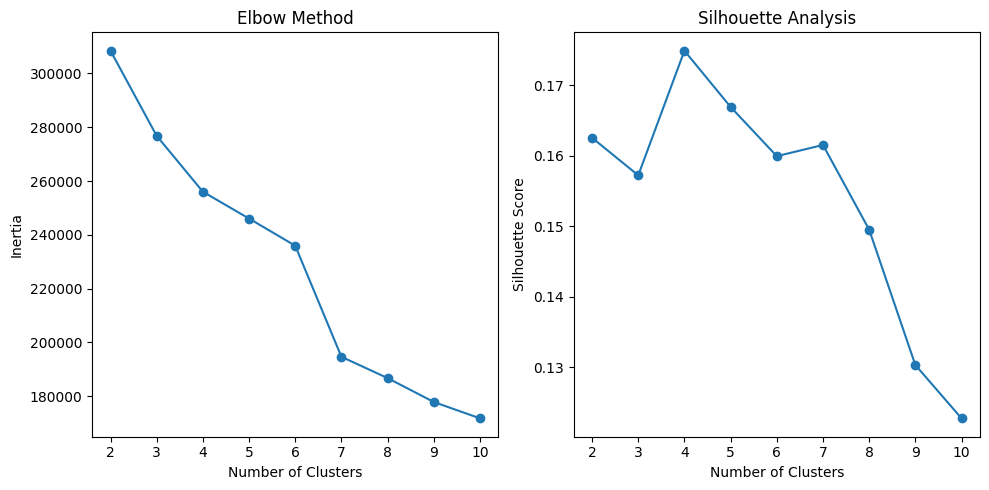

In [9]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(n_clusters_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')

# Plot the silhouette scores
plt.subplot(1, 2, 2)
plt.plot(n_clusters_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.tight_layout()
plt.show()

In [38]:
optimal_clusters = 5


In [39]:
# Step 3: Clustering with the Optimal Number of Clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(scaled_data)
labels = kmeans.labels_

Similar Players to LeBron James:
          Player  Cluster                                              Stats
0   LeBron James        3  [27.0, 0.619, 30.0, 4.0, 20.7, 41.3, 1.6, 1.3,...
1   James Harden        3  [24.5, 0.618, 28.4, 2.5, 20.6, 44.4, 1.6, 1.8,...
2   Kyrie Irving        3  [24.3, 0.592, 29.6, 3.4, 12.7, 35.0, 2.2, 1.4,...
3     Grant Hill        3  [23.9, 0.543, 29.6, 4.3, 19.3, 33.6, 2.4, 1.2,...
4  Stephen Curry        3  [24.1, 0.656, 31.0, 2.3, 16.8, 30.0, 1.3, 0.9,...
5   Kevin Durant        3  [25.6, 0.634, 31.2, 1.6, 19.6, 29.1, 1.1, 2.3,...
6      Ja Morant        0  [20.6, 0.57, 30.4, 2.0, 15.8, 42.2, 1.1, 1.5, ...
7     Larry Bird        3  [21.9, 0.546, 27.4, 3.6, 22.2, 28.9, 1.8, 1.2,...
8   Tyreke Evans        3  [21.1, 0.561, 28.4, 3.1, 16.3, 31.2, 1.8, 1.0,...
9    Luka Dončić        3  [19.6, 0.545, 30.5, 4.0, 21.9, 31.6, 1.6, 0.9,...

Stats for Similar Players:
          Player Cluster   per  ts_percent  usg_percent  orb_percent  \
0   LeBron James    

C:\Users\mucky\AppData\Local\Temp\ipykernel_40804\495973154.py:43: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  stats_df = pd.concat([stats_df, new_row], ignore_index=True)


<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

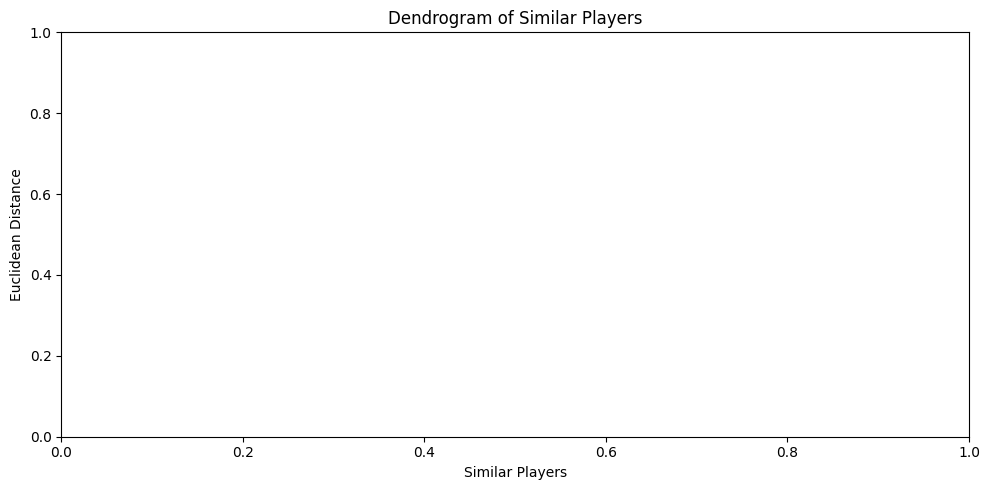


Model Evaluation:
Silhouette Score: 0.167
Davies-Bouldin Index: 1.613


In [48]:
import scipy.cluster.hierarchy as shc

data['Cluster'] = labels

# Step 6: Find Similar Players to a Specific Player
def find_similar_players(player_name, num_similar=5):
    player_data = data[data['player'] == player_name]
    
    if len(player_data) == 0:
        print(f"Player '{player_name}' not found in the dataset.")
        return None
    
    player_index = player_data.index[0]
    player_features = scaled_data[player_index]
    
    distances = np.linalg.norm(scaled_data - player_features, axis=1)
    nearest_indices = distances.argsort()[1:]  # Exclude the selected player
    
    similar_players = []
    displayed_players = set()
    
    for index in nearest_indices:
        if len(similar_players) >= num_similar:
            break
        
        player = data.iloc[index]['player']
        
        if player not in displayed_players:
            similar_player_stats = data.iloc[index][features].tolist()
            similar_players.append((player, data.iloc[index]['Cluster'], similar_player_stats))
            displayed_players.add(player)
    
    similar_players_df = pd.DataFrame(similar_players, columns=['Player', 'Cluster', 'Stats'])
    
    print(f"Similar Players to {player_name}:")
    print(similar_players_df)
    
    # Create a DataFrame with stats for each similar player
    stats_df = pd.DataFrame(columns=['Player', 'Cluster'] + features)
    for _, row in similar_players_df.iterrows():
        player = row['Player']
        cluster = row['Cluster']
        stats = row['Stats']
        new_row = pd.DataFrame([[player, cluster] + stats], columns=stats_df.columns)
        stats_df = pd.concat([stats_df, new_row], ignore_index=True)
    
    # Display the stats in a table format
    print("\nStats for Similar Players:")
    print(stats_df)
    
    return similar_players_df, stats_df

# Get user input for player name and number of similar players
player_name = input("Enter the player name: ")
num_similar = int(input("Enter the number of similar players to find: "))

# Find similar players
similar_players_df, stats_df = find_similar_players(player_name, num_similar)

# Visualize Similar Players using Dendrogram
if similar_players_df is not None:
    similar_player_features = scaled_data[data['player'].isin(stats_df['Player'])]
    
    linked = linkage(similar_player_features, method='ward')
    
    plt.figure(figsize=(10, 5))
    plt.title('Hierarchical Clustering Dendrogram')
    dend = shc.dendrogram(linked, labels=stats_df['Player'].values, leaf_rotation=90)
    plt.xlabel('Similar Players')
    plt.ylabel('Euclidean Distance')
    plt.title('Dendrogram of Similar Players')
    plt.tight_layout()
    plt.show()

# Model Evaluation
print("\nModel Evaluation:")
silhouette_avg = silhouette_score(scaled_data, labels)
db_index = davies_bouldin_score(scaled_data, labels)

print(f"Silhouette Score: {silhouette_avg:.3f}")
print(f"Davies-Bouldin Index: {db_index:.3f}")